[meshgrid short tutorial](https://www.youtube.com/watch?v=sHwdoSQpMFQ)
- [source code](https://github.com/lukepolson/youtube_channel/blob/main/Python%20Shorts/meshgrid1.ipynb)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'dark_background'])

Arrays of equaly spaced values can be created with:
- `arange`
- `linspace`

In [3]:
x = np.arange(0, 10, 1)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
x = np.linspace(0, 1, 21)
x

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

then you can define a 1D function $ f(x)= x^2 sin(10x) $

In [5]:
f0 = x**2 * np.sin(x*10)
f0

array([ 0.        ,  0.00119856,  0.00841471,  0.02244364,  0.0363719 ,
        0.03740451,  0.0127008 , -0.04297095, -0.1210884 , -0.19794985,
       -0.23973107, -0.21342595, -0.10058958,  0.09088819,  0.32192343,
        0.52762499,  0.63318928,  0.57690694,  0.33381597, -0.06782389,
       -0.54402111])

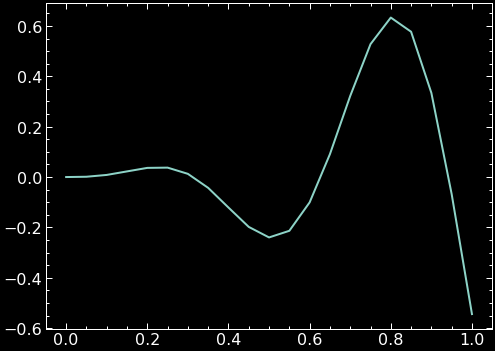

In [6]:
plt.plot(x, f0)

How do we do this in 2D?

## Meshgrid
The `np.meshgrid` function is used primarily for
- Creating/Plotting 2D functions f(x, y)
- Generating combinations of 2 or more numbers

how data (x, y) is represented when using meshgrid, *example*:

In [17]:
x = y = np.arange(3)
xv, yv = np.meshgrid(x, y)
print('x:\n', xv)
print('y:\n', yv)
print('f(x,y):\n',xv**2 + yv**2)

x:
 [[0 1 2]
 [0 1 2]
 [0 1 2]]
y:
 [[0 0 0]
 [1 1 1]
 [2 2 2]]
f(x,y):
 [[0 1 4]
 [1 2 5]
 [4 5 8]]


How you might think to create a 2D function $ f(x,y) = x^2 + y^2 $ 

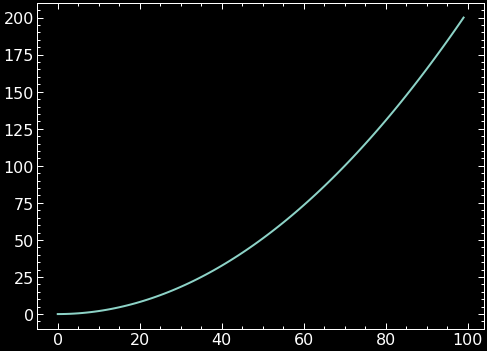

In [8]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)

def f1(x, y):
    return x**2 + y**2

plt.plot(f1(x, y))

But $ f(x,y) $ is a 1D function! How does one generate a surface plot?

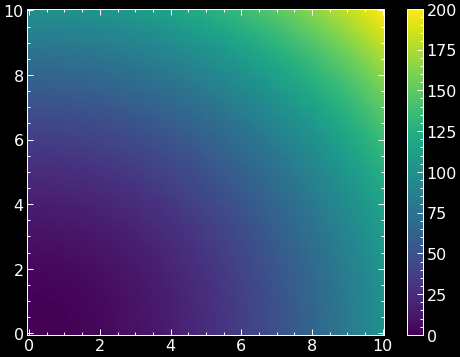

In [9]:
xv, yv = np.meshgrid(x,y)

plt.pcolormesh(xv, yv, f1(xv, yv), shading='nearest')
plt.colorbar()

*NOTE*: [`pcolormesh`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html)
is preferable function for 2D plotting (as opposed to `imshow` or `pcolor`, which take longer)

function:

$ f(x, y) = e^{-(x^2+y^2)} $ for $ -2 \leq x \leq 2 $ and $ -1 \leq y \leq 1  $

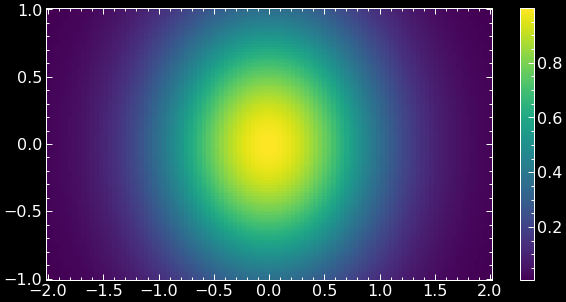

In [10]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)
xv, yv = np.meshgrid(x, y)

f2 = np.exp(-xv**2-yv**2)

plt.figure(figsize=(10,5))
plt.pcolormesh(xv, yv, f2, shading='nearest')
plt.colorbar()

Creating a mask:

$ f(x, y) = \begin{cases} 1 & x^2+y^2 \lt 1 \\ 0 & x^2+y^2 \geq 1 \end{cases} $ 
for $ -5 \leq x \leq 5 $ and $ -5 \leq y \leq 5 $

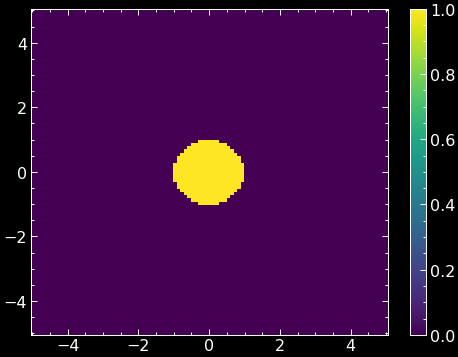

In [11]:
x = y = np.linspace (-5, 5, 100)
xv, yv = np.meshgrid(x, y)
f3 = (xv**2 + yv**2 < 1).astype(float)
plt.pcolormesh(xv, yv, f3, shading='nearest')
plt.colorbar()